In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ConceptofAIandTechnology/Assignment2/heart_attack_risk_dataset.csv')
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
df.shape

(50000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [ ]:
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
df=df[df['Heart_Attack_Risk']!='Moderate']

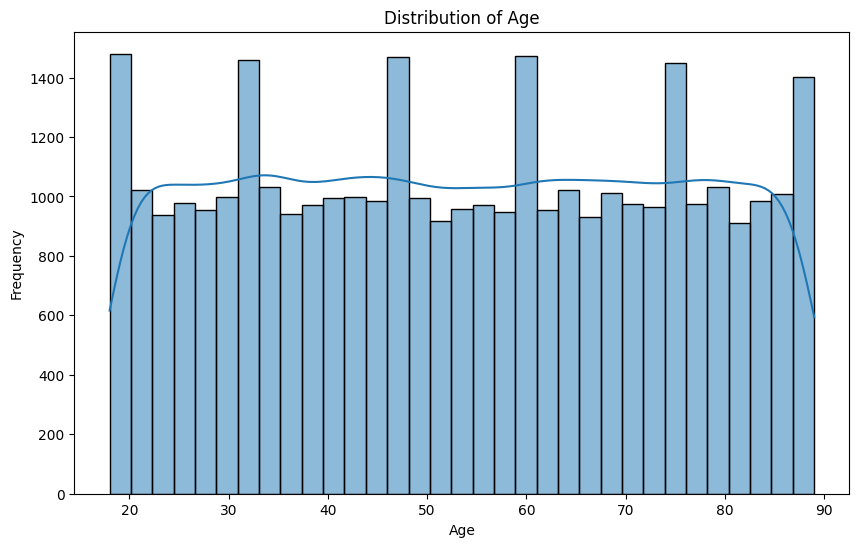

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram reveals a relatively uniform distribution of age, with a slight increase in frequency in the younger age groups

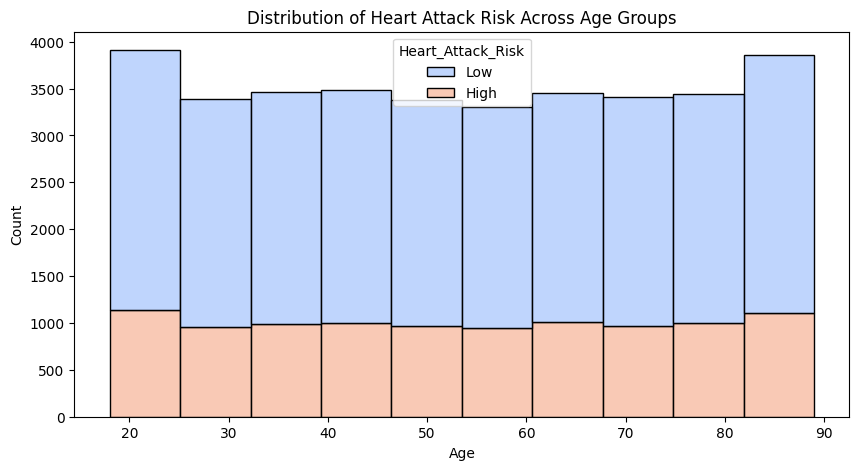

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Heart_Attack_Risk", multiple="stack", bins=10, palette="coolwarm")
plt.title("Distribution of Heart Attack Risk Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

This stacked histogram shows that across all age groups, the number of people at low risk for heart attack is consistently the highest, followed by moderate risk, and then high risk, which is the lowest.  While the distribution of risk levels changes somewhat across age, the overall pattern of having the most people at low risk remains consistent.

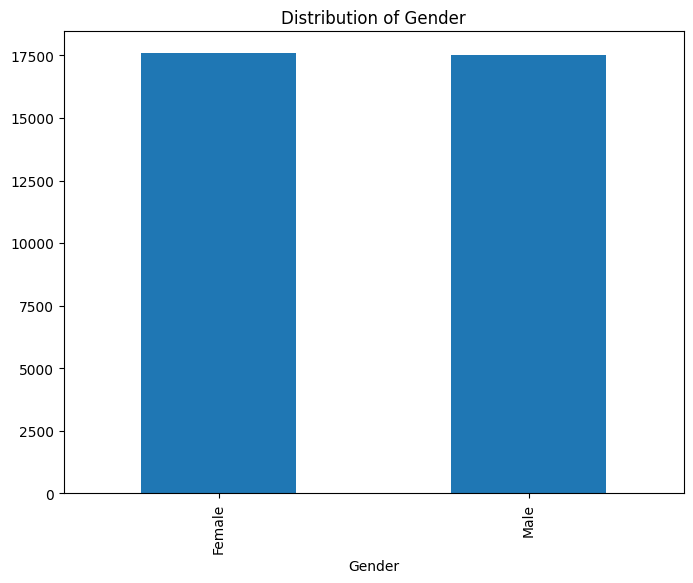

In [ ]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.show()

There are equal number of male and female in the dataset

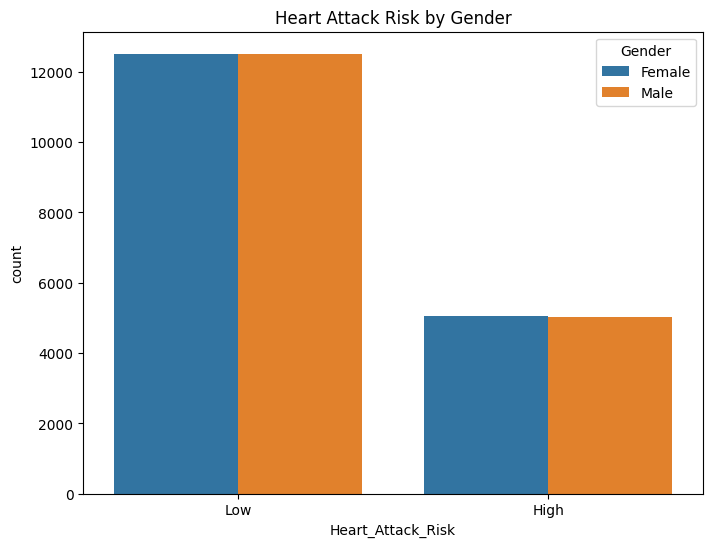

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart_Attack_Risk', hue='Gender', data=df)
plt.title('Heart Attack Risk by Gender')
plt.show()

From the above plot we can clearly see that there is equal chance of suffering from heart attack

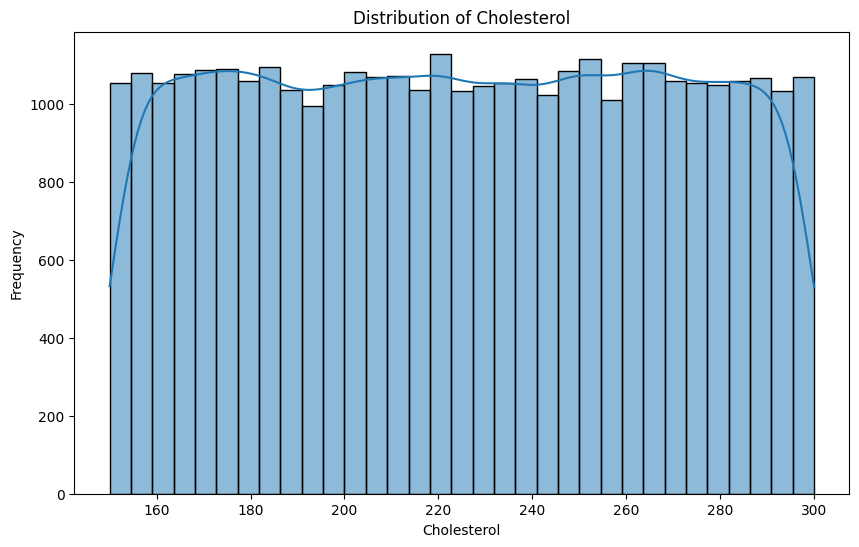

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol_Level'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

The histogram shows a relatively even distribution of cholesterol levels, with a slight peak in the mid range, suggesting that most individuals in this dataset have cholesterol levels within a moderate range.

## EDA with respect to cholestrol level

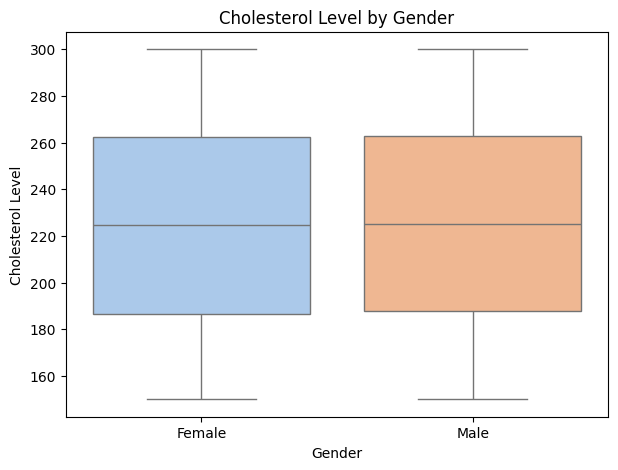

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Gender", y="Cholesterol_Level", palette="pastel")
plt.title("Cholesterol Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Cholesterol Level")
plt.show()

Cholesterol levels are comparable between males and females, with similar medians and interquartile ranges.

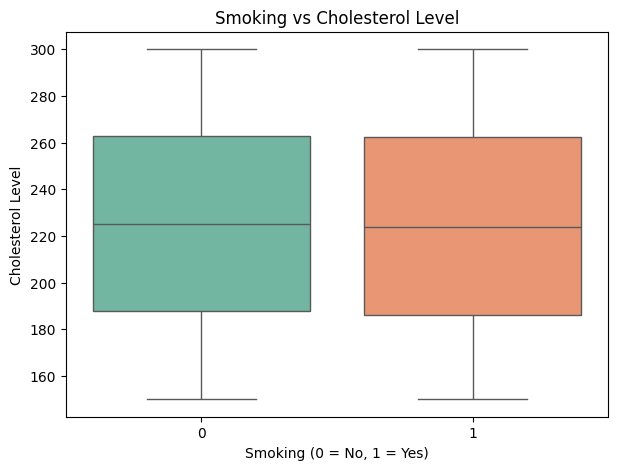

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Smoking", y="Cholesterol_Level", palette="Set2")
plt.title("Smoking vs Cholesterol Level")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()

Cholesterol levels are comparable between smoking and non smoking, with similar medians and interquartile ranges.

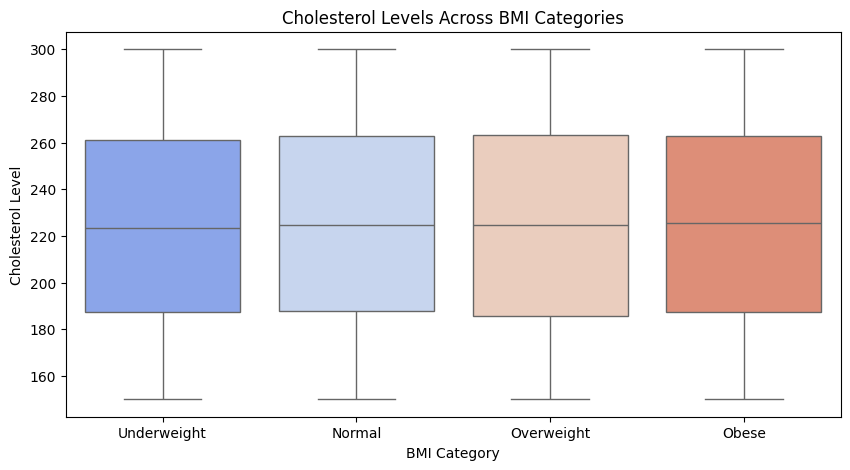

In [ ]:
plt.figure(figsize=(10, 5))
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 40],
                            labels=["Underweight", "Normal", "Overweight", "Obese"])
sns.boxplot(data=df, x="BMI", y="Cholesterol_Level", palette="coolwarm")
plt.title("Cholesterol Levels Across BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Cholesterol Level")
plt.show()


Cholesterol levels show minimal variation across different BMI categories, with similar medians and ranges.

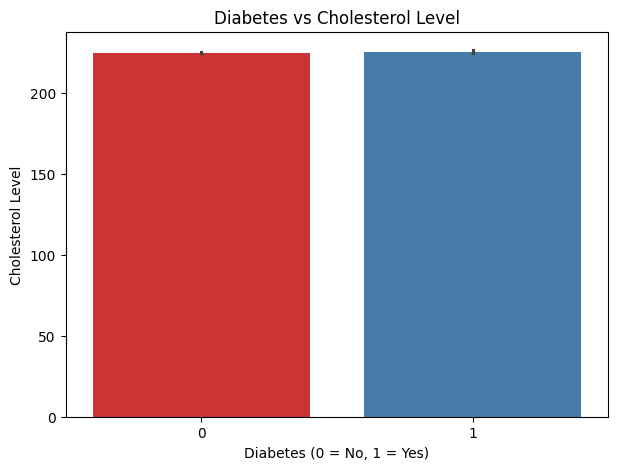

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x="Diabetes", y="Cholesterol_Level", palette="Set1")
plt.title("Diabetes vs Cholesterol Level")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()

Cholesterol levels appear similar regardless of diabetes status, with no significant difference between diabetic and non-diabetic groups.

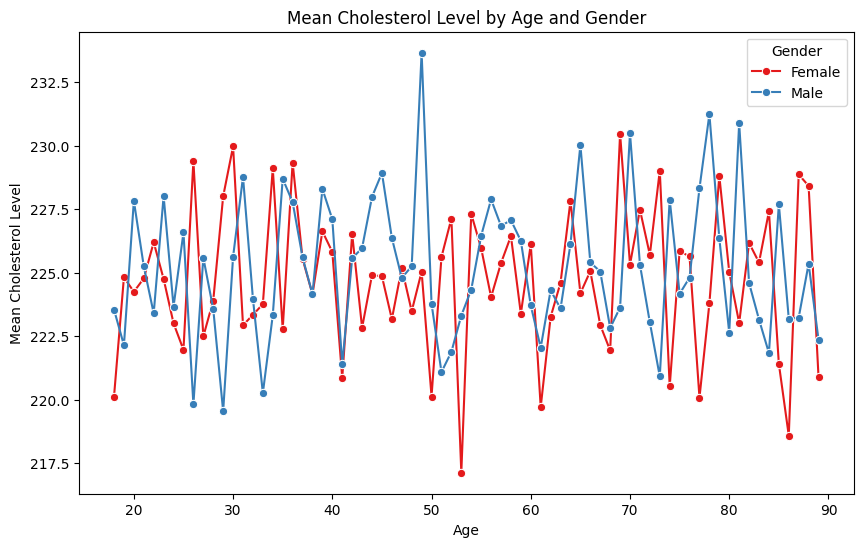

In [ ]:
age_gender_group = df.groupby(['Age', 'Gender'])['Cholesterol_Level'].mean().reset_index()

# Plot the mean Cholesterol Level by Age and Gender using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Cholesterol_Level', hue='Gender', data=age_gender_group, marker='o', palette='Set1')
plt.title('Mean Cholesterol Level by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol Level')
plt.legend(title='Gender')
plt.show()


Mean cholesterol levels fluctuate across age groups without a clear trend, and differences between males and females are minimal overall.

In [ ]:
from scipy import stats
mean_cholesterol_by_alcohol = df.groupby('Alcohol_Consumption')['Cholesterol_Level'].mean()
print("Mean Cholesterol Level by Alcohol Consumption:")
print(mean_cholesterol_by_alcohol)

# Perform a t-test to assess if there is a significant difference in Cholesterol Levels
group_no_alcohol = df[df['Alcohol_Consumption'] == 0]['Cholesterol_Level']
group_alcohol = df[df['Alcohol_Consumption'] == 1]['Cholesterol_Level']

t_stat, p_value = stats.ttest_ind(group_no_alcohol, group_alcohol)
print(f"T-test result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a significant difference in Cholesterol Levels based on alcohol consumption.")
else:
    print("There is no significant difference in Cholesterol Levels based on alcohol consumption.")

Mean Cholesterol Level by Alcohol Consumption:
Alcohol_Consumption
0    224.998667
1    224.849716
Name: Cholesterol_Level, dtype: float64
T-test result: t-statistic = 0.32, p-value = 0.7522
There is no significant difference in Cholesterol Levels based on alcohol consumption.


In [ ]:
# categoriacl column which is needed for encoding
columns_to_encode = ['Gender', 'Physical_Activity_Level', 'Stress_Level',
                       'Chest_Pain_Type', 'Thalassemia', 'ECG_Results',
                       'Heart_Attack_Risk']


In [ ]:
df.drop(columns=['BMI'],inplace=True)

In [ ]:
# Convering categorical data into numerical
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:

df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,1,0,152.1,171,85,0,2,2,2,0,1,0,114,1
2,89,1,0,1,2,0,0,272.3,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,1,0,237.7,144,125,0,1,3,0,1,0,0,129,1
5,41,1,0,1,2,0,0,271.2,141,119,0,1,1,0,0,1,0,101,0
6,20,1,1,0,1,0,0,164.8,154,67,0,1,2,1,0,1,0,176,1


In [ ]:
# Spliting into independence and target variables
X=df.drop(columns=['Cholesterol_Level'])
y=df['Cholesterol_Level']

In [ ]:
y

,Cholesterol_Level
0,152.1
2,272.3
3,237.7
5,271.2
6,164.8
...,...
49992,181.8
49993,196.7
49994,171.7
49995,269.9


In [ ]:
#Scaling the data to make them in similar range
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [ ]:
# Spliting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

Building Primary Model For Regression using Cholestrol level as target variable

In [ ]:
#Linear Regression model from scratch
class LinearRegression:
    def __init__(self,L=0.001,epochs=1000,m=0,c=0):
        self.L=L # Learning rate
        self.epochs=epochs # Number of iterations
        self.m=None # Slope (initialized later)
        self.c=0 # Intercept (bias term)

    def fit(self,x,y):
        n_samples,n_features=x.shape  # Get number of samples and features
        self.m=np.zeros(n_features)   # Initialize weights to zero

        for _ in range(self.epochs):
            y_pred = np.dot(x, self.m) + self.c

           # Compute gradients
            d_m = (-2/n_samples) * np.dot(x.T, (y - y_pred))
            d_c = (-2/n_samples) * np.sum(y - y_pred)

            # Update parameters using gradient descent
            self.m -= self.L * d_m
            self.c -= self.L * d_c

    def predict(self,x):
        return np.dot(x, self.m) + self.c

Train Base model


In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [ ]:
results = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R2': r2_score(y_test, y_pred_lr)
}

print("Result")
print(results)

Result
{'MAE': 43.6557883987985, 'RMSE': 52.857924930230816, 'R2': -0.4840111442045345}


Building Two model from sklearn

Model 1 : RandomFOrestClassifier

In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [ ]:
# Evaluation matirx for RandomForest
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

print("Random Forest Result")
print(rf_results)

Random Forest Result
{'MAE': 37.91793247221958, 'RMSE': 44.00858568290481, 'R2': -0.028707168327736232}


Random Forest tends to improve a little than the Linear model but also perform poorly

Model 2: SVR

In [ ]:
sv=SVR(kernel='rbf')
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)

In [ ]:
# Evaluation matirx for SVR
svm_results = {
    'MAE': mean_absolute_error(y_test, y_pred_sv),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sv)),
    'R2': r2_score(y_test, y_pred_sv)
}

print("Support Vector Regressor Result")
print(svm_results)

Support Vector Regressor Result
{'MAE': 37.5904107819602, 'RMSE': 43.45751342803396, 'R2': -0.0031056780550688945}


Both Support Vector Regressor and Random Forest Regressor are underperforming with negative R² values, indicating poor model fit to the data.

Hyper Parameter tunning for Random Forest Regressor


In [ ]:
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 200), # Number of trees in the forest (randomly chosen between 10 and 200)
    'max_depth': [None, 10, 20, 30, 40], # Number of trees in the forest (randomly chosen between 10 and 200)
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features considered for each split
}

random_search_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=30, cv=3, n_jobs=-1,verbose=2,  random_state=42,scoring='neg_mean_squared_error')

# Fit the model with RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Retrieve the best model with optimized hyperparameters
best_model_rf = random_search_rf.best_estimator_
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 155}


In [ ]:
# Training with best parameter
best_model_rf.fit(X_train,y_train)
y_pred_rf_hp=best_model_rf.predict(X_test)
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_hp)),
    'R2': r2_score(y_test, y_pred_rf_hp)
}

print("Final Model Performance:")
print(rf_results)

Final Model Performance:
{'MAE': 37.567910881583416, 'RMSE': 43.42996393387407, 'R2': -0.0018342617983659881}


Hyperparameter tuning for SVR

In [ ]:
param_dist = {
    'C': [0.1, 1, 10, 100], # Regularization parameter (higher values make the model more complex)
    'epsilon': [0.1, 0.2, 0.5], # Defines a margin of tolerance where predictions aren't penalized
    'kernel': ['linear'] # Using a linear kernel (SVR also supports 'rbf', 'poly', etc.)
}



random_search_svr = RandomizedSearchCV(estimator=sv,param_distributions=param_dist,  n_iter=30,cv=3, n_jobs=-1,verbose=2,random_state=42, scoring='neg_mean_squared_error')

# Fit the model with RandomizedSearchCV to find the best hyperparameters
random_search_svr.fit(X_train, y_train)
# Retrieve the best model with optimized hyperparameters
best_model_svr = random_search_svr.best_estimator_
print("Best parameters found: ", random_search_svr.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'kernel': 'linear', 'epsilon': 0.5, 'C': 0.1}


In [ ]:
# Trainign  the model with best parameter
best_model_svr.fit(X_train,y_train)
y_pred_svr_hp=best_model_svr.predict(X_test)
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_svr_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr_hp)),
    'R2': r2_score(y_test, y_pred_svr_hp)
}

print("Final Model Performance:")
print(rf_results)

Final Model Performance:
{'MAE': 37.56443126866838, 'RMSE': 43.39949667699349, 'R2': -0.00042912890620749877}


Feature selection for Random Forest

In [ ]:
# Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) for automatically automatically selects the best number of features
from sklearn.feature_selection import RFECV
rfecv_rf = RFECV(estimator=rf, step=1,cv=5,scoring="r2",min_features_to_select=int(0.8 * X_train.shape[1]), n_jobs=-1,verbose=1)

# Fit RFECV on the resampled training dataset
rfecv_rf.fit(X_train, y_train)
# Get the optimal number of selected features
X_train_rf = rfecv_rf.transform(X_train)
X_test_rf = rfecv_rf.transform(X_test)
# Get a boolean mask indicating which features were selected (True for selected, False for removed)
print(f"RF Optimal Features: {rfecv_rf.n_features_}")


Fitting estimator with 18 features.
RF Optimal Features: 17


In [ ]:
# Initialize SelectKBest feature selection using Mutual Information for regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
mi = SelectKBest(
    score_func=mutual_info_regression, # Use mutual information to measure feature importance
    k=int(0.8 * X_train.shape[1]))  # Select top 80% of features based on importance

# Fit the selector to the training data and transform it
X_train_mi = mi.fit_transform(X_train, y_train)

# Apply the same transformation to the test data (using the selected features)
X_test_mi = mi.transform(X_test)

In [ ]:
X_train.shape

(24567, 18)

In [ ]:
selected_features = mi.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

Selected feature indices: [ 2  5  6  7  8  9 10 11 12 13 14 15 16 17]


Final Model


Random Forest

In [ ]:
# Training the model with best parameter and selected featue for Random Forest
best_model_rf.fit(X_train_rf,y_train)
y_pred_rf_final=best_model_rf.predict(X_test_rf)
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_final)),
    'R2': r2_score(y_test, y_pred_rf_final)
}

print("Final Model Performance:")
print(rf_results)

Final Model Performance:
{'MAE': 37.583163301503646, 'RMSE': 43.44207013273332, 'R2': -0.002392866692705331}


The model performed poorly with an MAE of 37.59, RMSE of 43.45, and an R² of -0.0025, indicating it fails to explain variance.

SVR

In [ ]:
# Training the model with best parameter and selected featue for SVR (Support vector machine)
best_model_svr.fit(X_train_mi,y_train)
y_pred_svr_final=best_model_svr.predict(X_test_mi)
svr_results = {
    'MAE': mean_absolute_error(y_test, y_pred_svr_final),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr_final)),
    'R2': r2_score(y_test, y_pred_svr_final)
}

print("Final Model Performance:")
print(svr_results)

Final Model Performance:
{'MAE': 37.559612552271595, 'RMSE': 43.3927097457826, 'R2': -0.00011625372137791246}


The model still underperforms with an MAE of 37.56, RMSE of 43.39, and an R² of -0.0001, showing minimal improvement but failing to explain variance.

Final Conclusion:
The second model shows a very slight improvement in performance, but both models fail to capture meaningful variance in the data (R² ≈ 0). Since the there is no strong correlation betwenn many feature so performance may get affected by this